# **Descriptive and Inferencial Statistics**

**Dataset:** Modified Version of - [**Brazilian National Household Sample Survey - 2015**](https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?=&t=downloads)

The **Brazilian National Household Sample Survey (BNHSS)** is an annual survey conducted in Brazil to investigate the general characteristics of the population. It collects data on education, employment, income, housing, and other relevant topics. For this analysis, we will be using a modified version of the BNHSS dataset from 2015.

Our dataset consists of the following columns:

- **State**: The state in Brazil where the data was collected.
- **Sex**: Gender of the individuals participating in the survey.
- **Age**: Age of the individuals.
- **Race**: Ethnicity or race of the individuals.
- **Years** of Study: Number of years of formal education completed by the individuals.
- **Income**: Income level of the individuals.
- **Height**: A variable created specifically for this analysis.

In this notebook, we will perform Descriptive and Inferential Statistics using the modified BNHSS dataset. Descriptive statistics will provide us with valuable insights into the characteristics of the population, allowing us to summarize and visualize the data. Inferential statistics, on the other hand, will enable us to draw conclusions and make predictions about the larger population based on the collected sample data.

Throughout the analysis, we will explore various statistical techniques, including hypothesis testing and confidence intervals, to analyze and interpret the data. By applying these statistical methods, we aim to uncover meaningful patterns, relationships, and trends within the dataset, contributing to a better understanding of the socioeconomic landscape in Brazil.

Let's dive into the fascinating world of descriptive and inferential statistics as we explore the modified BNHSS dataset!

Importing Libraries

In [246]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Analysis
from scipy.stats import t, ttest_ind, pearsonr

Data Dictionary

In [247]:
sex = {
    0: 'Men',
    1: 'Women'
}

race = {
    0: 'Indigenous',
    2: 'White',
    4: 'Black',
    6: 'Yellow',
    8: 'Pard'
}

years_of_study = {
    0: 'Undetermined',
    1: '0 or < 1',
    2: '1 year',
    3: '2 years',
    4: '3 years',
    5: '4 years',
    6: '5 years',
    7: '6 years',
    8: '7 years',
    9: '8 years',
    10: '9 years',
    11: '10 years',
    12: '11 years',
    13: '12 years',
    14: '13 years',
    15: '14 years',
    16: '>= 15'
}

state = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [248]:
df = pd.read_csv('data.csv')
# Renaming columns names
df.rename(columns={'UF':'State', 'Sexo':'Sex', 'Idade':'Age', 'Cor':'Race', 'Anos de Estudo': 'Years of Study', 'Renda':'Income', 'Altura':'Height'}, inplace = True)
df.head()

,State,Sex,Age,Race,Years of Study,Income,Height
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [249]:
df.shape

(76840, 7)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           76840 non-null  int64  
 1   Sex             76840 non-null  int64  
 2   Age             76840 non-null  int64  
 3   Race            76840 non-null  int64  
 4   Years of Study  76840 non-null  int64  
 5   Income          76840 non-null  int64  
 6   Height          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [251]:
df.isna().sum()

State             0
Sex               0
Age               0
Race              0
Years of Study    0
Income            0
Height            0
dtype: int64

In [252]:
df.isnull().sum()

State             0
Sex               0
Age               0
Race              0
Years of Study    0
Income            0
Height            0
dtype: int64

## **``Descriptive Statistics``**

- Distribution of categorial and numerical variables
- Cross Variables Analysis (Multiple variables)
- Summary Statistics (Mean, Median, Std)

And at last we will have some **Questions to be answered**

### **Frequency / Distribution**

#### Categorical Variables

- Category **Sex** is inbalance, there are more mens in the data set
- **Races** 2 (white) and 8 (Pard) are predominant in the data set
- Exists peaks at 12 and 16 in **Years of Study**, because it is the time when people complete their high school in the first case or undergraduate in the second.

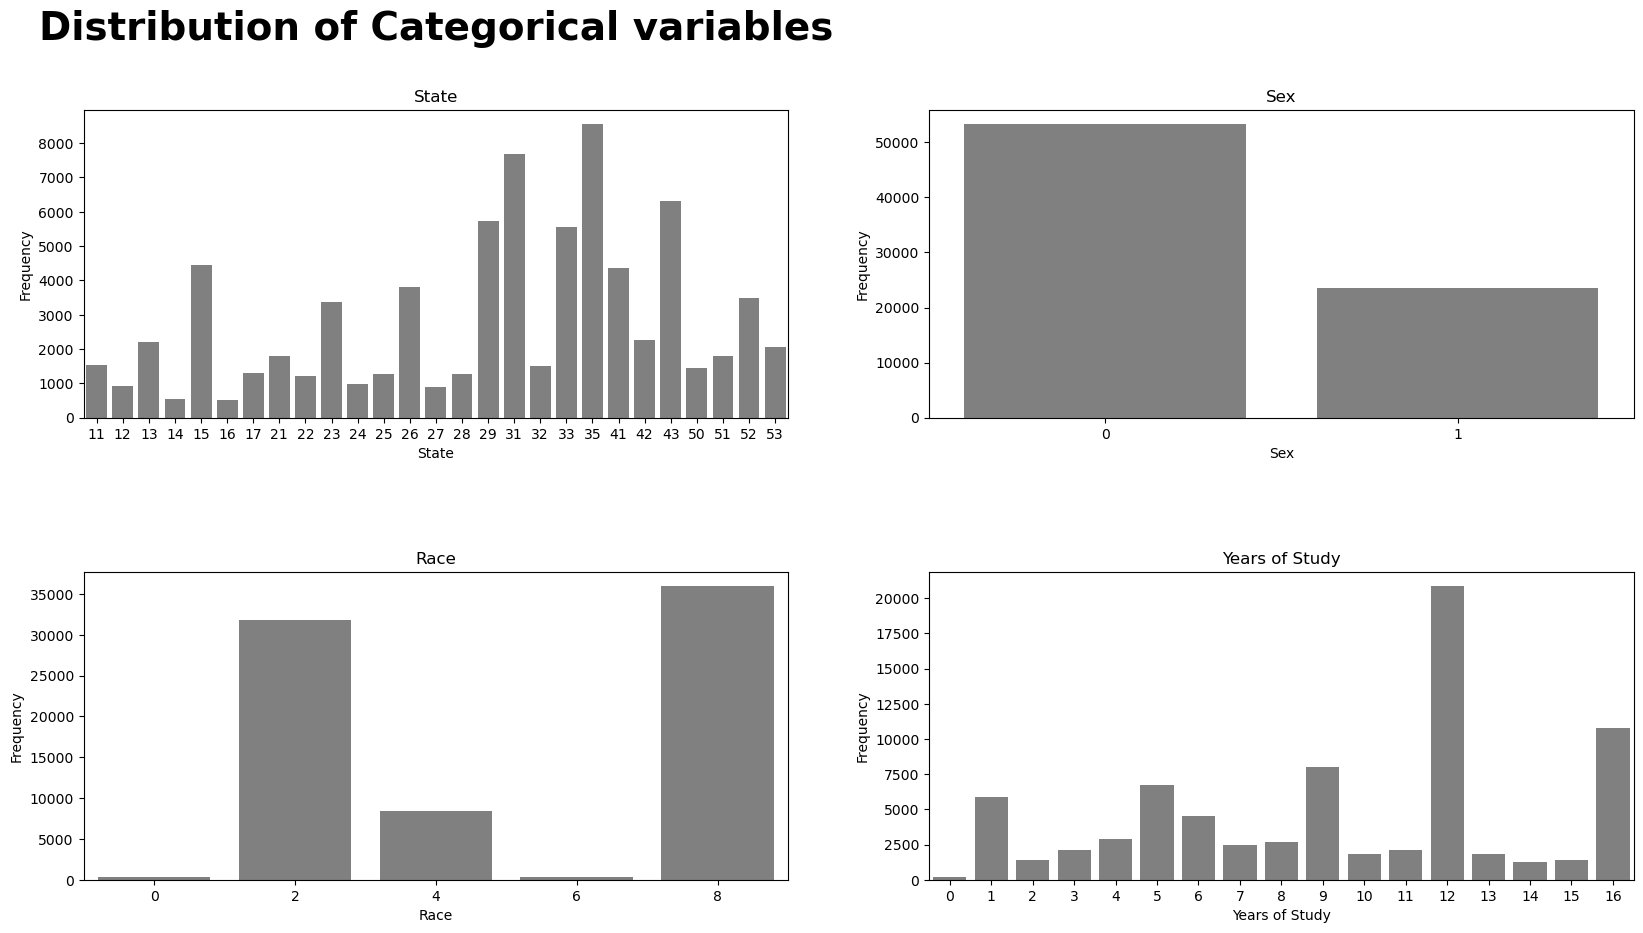

In [253]:
cat_col = ['State', 'Sex', 'Race', 'Years of Study']

plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Distribution of Categorical variables', fontsize=28,fontweight ='bold', horizontalalignment = 'right')


for n, col in enumerate(cat_col):
    ax = plt.subplot(2, 2, n + 1)

    sns.countplot(data=df, x=col, color = 'grey', ax = ax)
    ax.set_title(col)
    ax.set_ylabel('Frequency')
    
plt.show()

#### Numerical Variables

- **Income** has a lot of extreme values (outliers) which make the distribution difficult to see
- **Heigh** and **Age** are approximately normal distribution

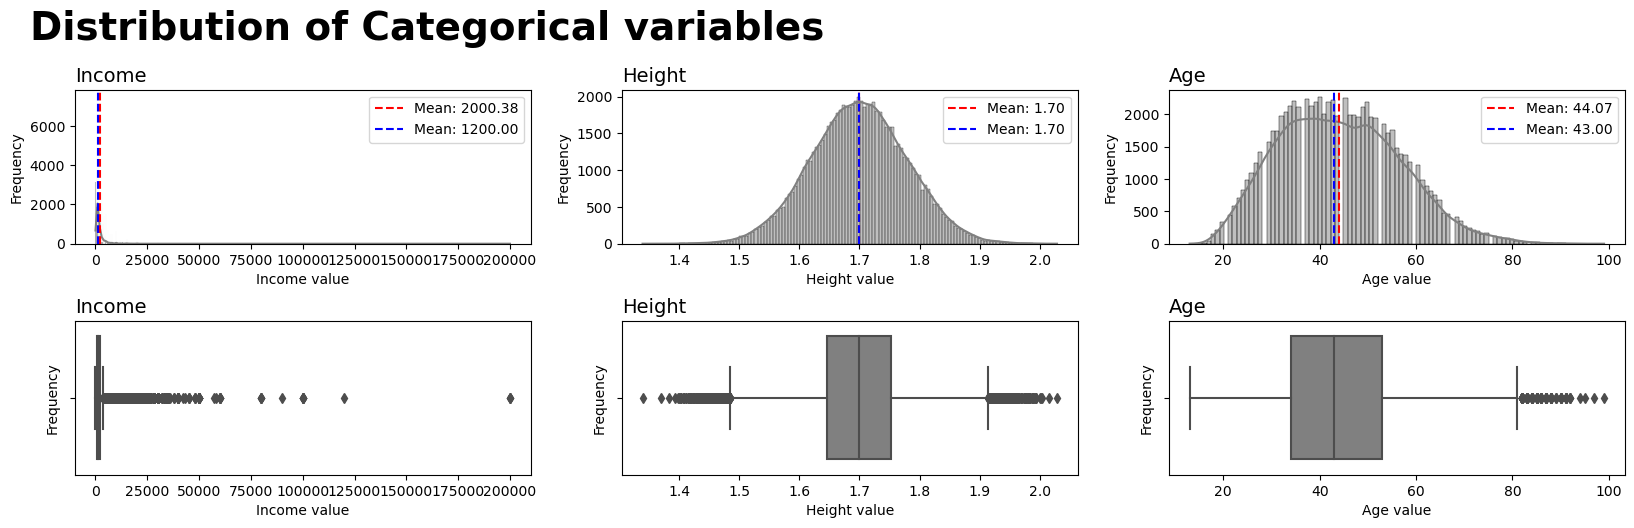

In [254]:
num_Var = ['Income', 'Height', 'Age', 'Income', 'Height', 'Age']

plt.figure(figsize=(20,5))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Distribution of Categorical variables', fontsize=28, fontweight='bold', horizontalalignment='right', verticalalignment='baseline')

for n, col in enumerate(num_Var):
    ax = plt.subplot(2, 3, n + 1)

    if n <=2: 
        sns.histplot(data=df, x=col, color='Grey', ax=ax, kde = True)
        ax.set_title(col, loc = 'left', size = 14)
        ax.set_ylabel('Frequency')
        ax.set_xlabel(f'{col} value')
        
        # Calculate mean and median
        mean_val = df[col].mean()
        median_val = df[col].median()

        # Add mean and median line
        ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='blue', linestyle='--', label=f'Mean: {median_val:.2f}')
        
        # Add legend
        ax.legend(loc = 'upper right')
    else:
        sns.boxplot(data=df, x=col, color='Grey', ax=ax)
        ax.set_title(col, loc = 'left', size = 14)
        ax.set_ylabel('Frequency')
        ax.set_xlabel(f'{col} value')
    
plt.show()

Filtering Income to see the distribution better

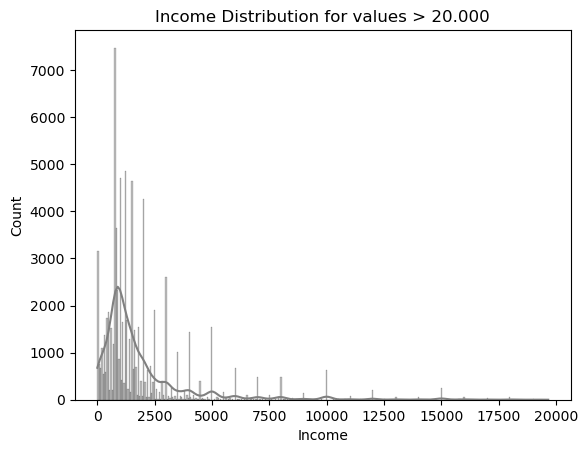

In [255]:
sns.histplot(data=df.query('Income < 20000'), x='Income', color='Grey', kde = True)
plt.title('Income Distribution for values > 20.000')
plt.show()

Using the mean, which is affected by outliers, to describe the central tendency of income (distribution skewed to the right) might not be the best choice, because we went up if a inflated value of 2000.

On the other hand by using the **median**, which is not affected by outliers, we have a more **robust estimate of the real crentral tendency** of Income, 1200.

In [256]:
print('Income statistics:')
df['Income'].agg(['mean', 'median','std'])

Income statistics:


mean      2000.383199
median    1200.000000
std       3323.387730
Name: Income, dtype: float64

### **Cross Variable Analysis**

Cross variable analysis towards our target variables **Income**

##### Sex

*Hypothesis*

- Men have average income higher than women.

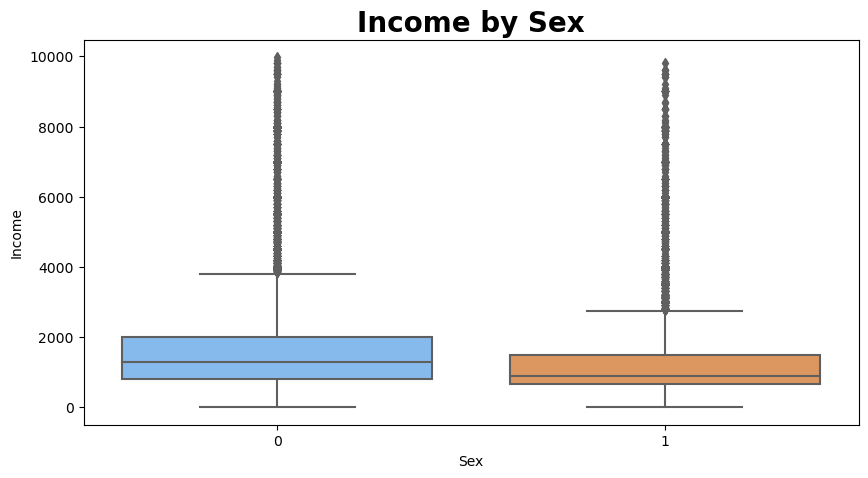

In [257]:
plt.figure(figsize=(10,5))

sns.boxplot(data=df.query('Income < 10000'), y='Income', x = 'Sex', palette=['#75bbfd', '#f0944d'])
plt.title('Income by Sex', fontsize = 20, fontweight='bold')
        
plt.show()

In [258]:
print('Income statistics by Sex:')
df.groupby('Sex').agg(['mean', 'median', 'std'])['Income']

Income statistics by Sex:


,mean,median,std
Sex,,,
0,2192.441596,1350.0,3590.312915
1,1566.847393,900.0,2570.663414


##### State

*Hypothesis*
- States is affecting the average Income
- State 53 (Distrito Federal) has higher average income than other states

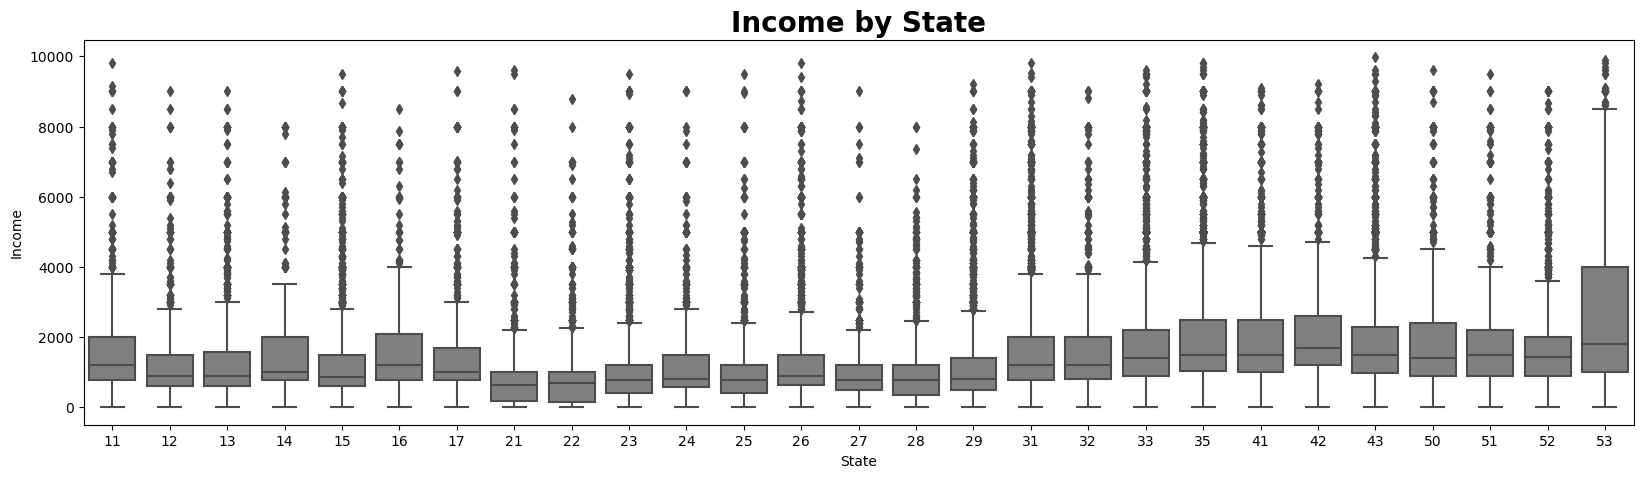

In [259]:
plt.figure(figsize=(20,5))

sns.boxplot(data=df.query('Income < 10000'), y='Income', x = 'State', color='Grey')
plt.title('Income by State', fontsize = 20, fontweight='bold')
        
plt.show()

*Hypothesis*

- State 27 (alagoas) is the only state that women have a equal average income than men


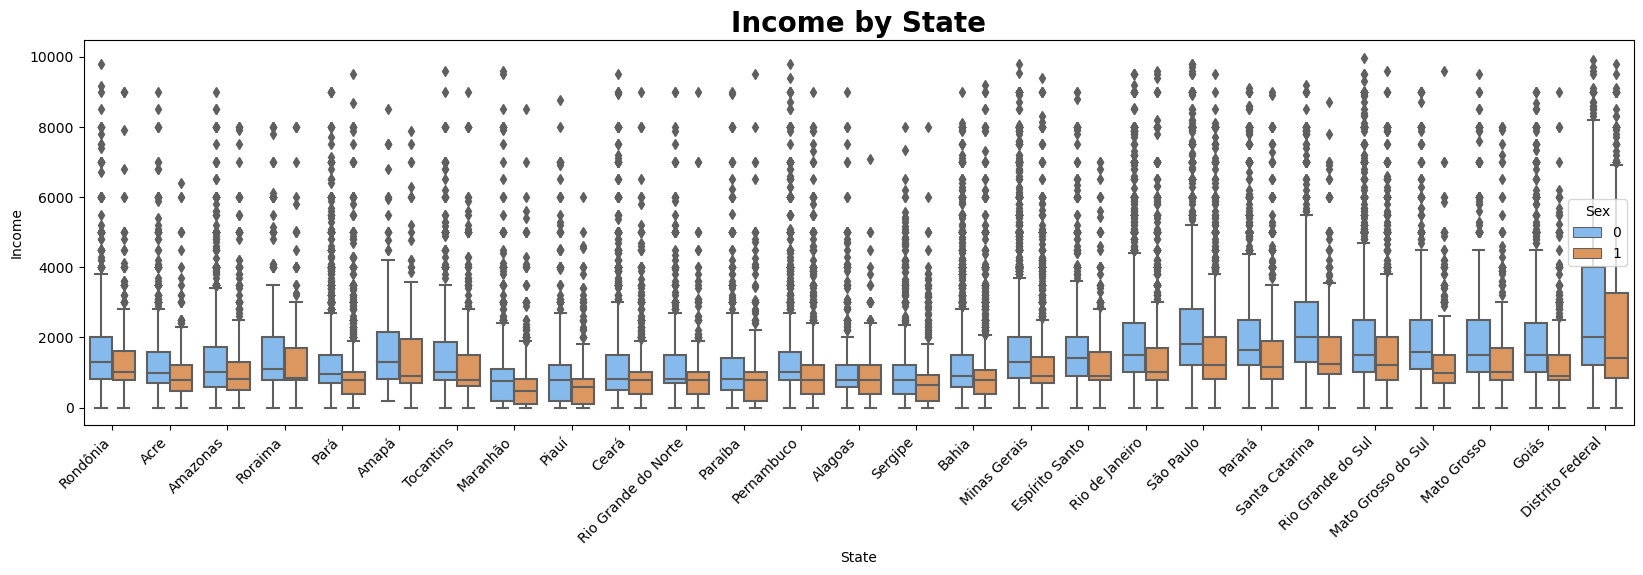

In [260]:
plt.figure(figsize=(20, 5))

ax = sns.boxplot(data=df.query('Income < 10000'), y='Income', x='State', hue='Sex', palette=['#75bbfd', '#f0944d'])
plt.title('Income by State', fontsize=20, fontweight='bold')

# Set the x-axis labels
ax.set_xticklabels(state.values(), rotation=45, ha='right')

plt.show()


In [261]:
agg_income = pd.crosstab(df.State, df.Sex, 
            aggfunc = ['mean', 'median', 'max', 'std'], 
            values = df.Income).round(2)
agg_income.rename(columns = sex, index = state, inplace = True)

agg_income

mean           median             max          \
Sex                      Men    Women     Men   Women     Men   Women   
State                                                                   
Rondônia             1921.21  1414.85  1300.0  1000.0   50000   12500   
Acre                 1635.34  1128.62  1000.0   788.0   30000   15000   
Amazonas             1539.99  1235.83  1000.0   800.0   22000   15000   
Roraima              1875.79  1608.11  1125.0   875.0   20000   18000   
Pará                 1509.74  1131.88   980.0   788.0   50000   16000   
Amapá                1930.40  1736.16  1337.5   920.0   15000   15580   
Tocantins            1912.51  1381.80  1100.0   788.0   60000    9000   
Maranhão             1165.17   723.75   788.0   480.0   30000    8500   
Piauí                1146.71   899.86   788.0   600.0   40000   30000   
Ceará                1341.62  1085.80   800.0   788.0   25000   24000   
Rio Grande do Norte  1459.05  1080.68   820.0   788.0   15500   12000   
Paraíba              1364.99  1119.70   800.0   788.0   30000   12200   
Pernambuco           1664.93  1252.24  1000.0   788.0   50000   30000   
Alagoas              1157.75  1105.47   788.0   788.0   10000   11000   
Sergipe              1205.57   877.15   800.0   665.0   16000   10000   
Bahia                1557.50  1175.02   900.0   788.0  200000   30000   
Minas Gerais         2283.16  1489.62  1400.0   900.0  100000   30000   
Espírito Santo       2129.32  1752.71  1500.0   927.0   40000  100000   
Rio de Janeiro       2777.55  1971.53  1510.0  1040.5  200000  120000   
São Paulo            2947.74  1950.18  1820.0  1200.0   80000   50000   
Paraná               2767.43  1796.26  1800.0  1200.0  200000   25000   
Santa Catarina       2688.30  1792.11  2000.0  1283.5   80000   13000   
Rio Grande do Sul    2488.39  1960.85  1600.0  1200.0   35000   25000   
Mato Grosso do Sul   2603.48  1519.89  1600.0   988.0   42000   25000   
Mato Grosso          2335.35  1604.29  1576.0  1000.0   35000   20000   
Goiás                2222.63  1339.38  1500.0   900.0   30000   26000   
Distrito Federal     4863.37  3269.88  2500.0  1500.0  100000   30000   

                         std           
Sex                      Men    Women  
State                                  
Rondônia             2644.12  1476.69  
Acre                 2493.55  1405.46  
Amazonas             1878.40  1436.59  
Roraima              2138.13  1957.18  
Pará                 2209.08  1587.78  
Amapá                1984.40  2084.58  
Tocantins            3291.59  1516.37  
Maranhão             2186.97   981.79  
Piauí                2485.36  2070.23  
Ceará                1842.21  1770.04  
Rio Grande do Norte  1764.86  1320.50  
Paraíba              2030.74  1730.08  
Pernambuco           2565.96  1964.27  
Alagoas              1250.91  1200.22  
Sergipe              1591.04  1135.09  
Bahia                4070.04  1930.92  
Minas Gerais         3952.09  2341.42  
Espírito Santo       2637.16  5160.62  
Rio de Janeiro       5562.92  4446.61  
São Paulo            3748.02  2767.42  
Paraná               4850.76  2249.06  
Santa Catarina       3447.90  1693.54  
Rio Grande do Sul    3049.80  2576.79  
Mato Grosso do Sul   3324.35  2083.73  
Mato Grosso          2760.47  1765.82  
Goiás                2382.05  1497.90  
Distrito Federal     6243.91  4061.46

##### Race

race = {
    0: 'Indigenous',
    2: 'White',
    4: 'Black',
    6: 'Yellow',
    8: 'Pard'
}

*Hypothesis*

- People from the race yellow have a higher average income than other races
- White people have a higher average income than indigenous, black, pard races

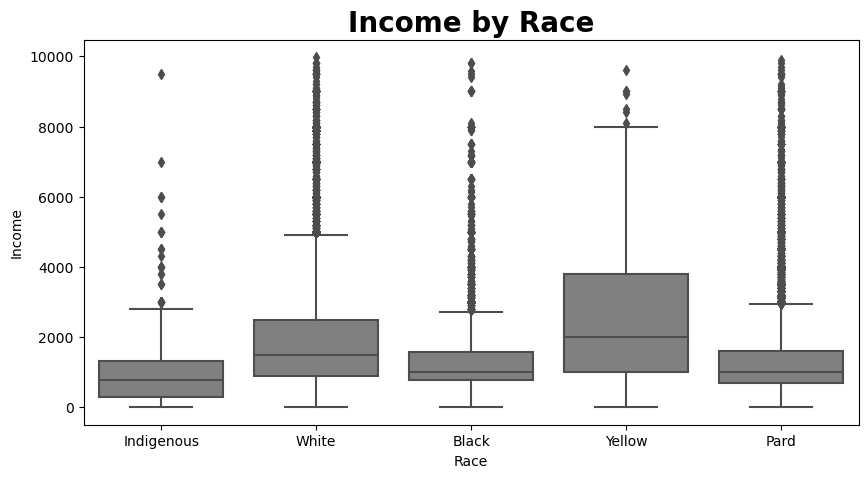

In [262]:
plt.figure(figsize=(10,5))

ax = sns.boxplot(data=df.query('Income < 10000'), y='Income', x = 'Race', color='Grey')
plt.title('Income by Race', fontsize = 20, fontweight='bold')

# Set the x-axis labels
ax.set_xticklabels(race.values())

plt.show()

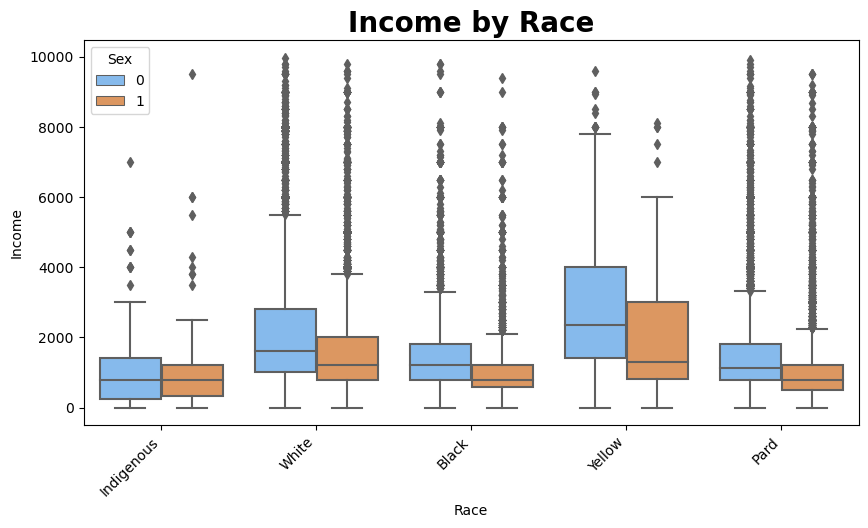

In [263]:
plt.figure(figsize=(10, 5))

ax = sns.boxplot(data=df.query('Income < 10000'), y='Income', x='Race', hue='Sex', palette=['#75bbfd', '#f0944d'])
plt.title('Income by Race', fontsize=20, fontweight='bold')

# Set the x-axis labels
ax.set_xticklabels(race.values(), rotation=45, ha='right')

plt.show()

In [264]:
agg_income = pd.crosstab(df.Race, df.Sex, 
            aggfunc = ['mean', 'median', 'max', 'std'], 
            values = df.Income).round(2)
agg_income.rename(columns = sex, index = race, inplace = True)

agg_income

mean           median             max              std  \
Sex             Men    Women     Men   Women     Men   Women      Men   
Race                                                                    
Indigenous  1081.71  2464.39   797.5   788.0   10000  120000  1204.09   
White       2925.74  2109.87  1700.0  1200.0  200000  100000  4750.79   
Black       1603.86  1134.60  1200.0   800.0   50000   23000  1936.31   
Yellow      4758.25  3027.34  2800.0  1500.0   50000   20000  5740.82   
Pard        1659.58  1176.76  1200.0   800.0  100000   30000  2312.09   

                      
Sex            Women  
Race                  
Indigenous  11957.50  
White        3251.01  
Black        1349.80  
Yellow       3731.17  
Pard         1596.23

##### Years of Study

*Hypothesis*

- Years of study is positively corelated with Average Income
- Average income for people with 15 or more years of education is higher than people with 14 years

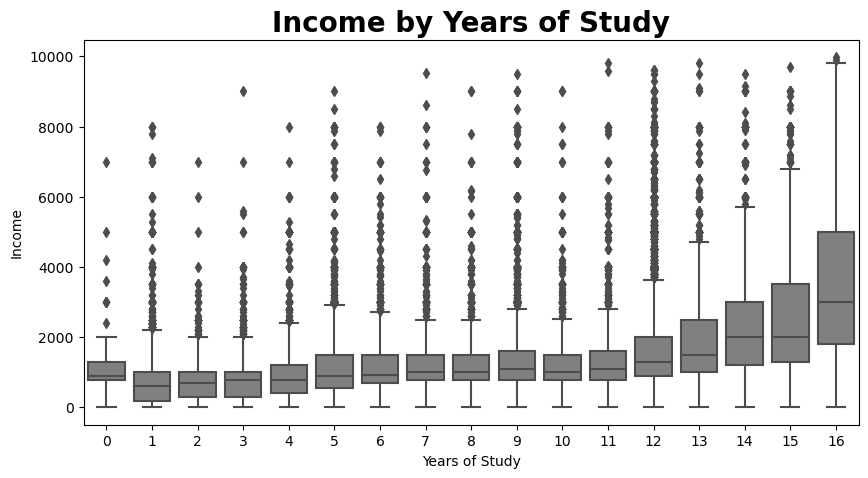

In [265]:
plt.figure(figsize=(10,5))

sns.boxplot(data=df.query('Income < 10000'), y='Income', x = 'Years of Study', color='Grey')
plt.title('Income by Years of Study', fontsize = 20, fontweight='bold')
        
plt.show()

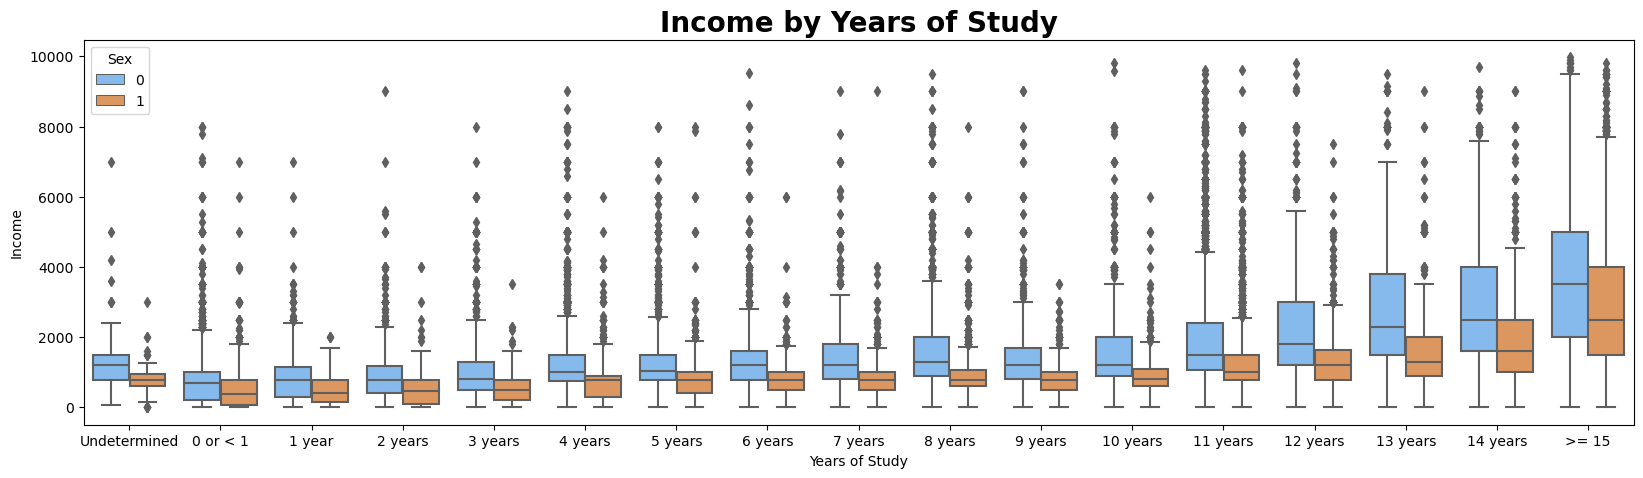

In [266]:
plt.figure(figsize=(20, 5))

ax = sns.boxplot(data=df.query('Income < 10000'), y='Income', x='Years of Study', hue='Sex', palette=['#75bbfd', '#f0944d'])
plt.title('Income by Years of Study', fontsize=20, fontweight='bold')

# Set the x-axis labels
ax.set_xticklabels(years_of_study.values())

plt.show()

In [267]:
agg_income = pd.crosstab(df['Years of Study'], df.Sex, 
            aggfunc = ['mean', 'median', 'max', 'std'], 
            values = df.Income).round(2)
agg_income.rename(columns = sex, index = years_of_study, inplace = True)

agg_income

mean          median           max              std  \
Sex                 Men    Women    Men Women     Men   Women      Men   
Years of Study                                                           
Undetermined    1295.76   798.17   1200   788    7000    3000   979.65   
0 or < 1         799.49   516.20    700   390   30000   10000  1023.90   
1 year           895.63   492.77    788   400   30000    2000  1331.95   
2 years          931.18   529.91    788   450   40000    4000  1435.17   
3 years         1109.20   546.85    800   500   80000    3500  2143.80   
4 years         1302.33   704.28   1000   788   50000   10000  1419.82   
5 years         1338.65   781.39   1045   788   35000    8000  1484.65   
6 years         1448.88   833.73   1200   788   25000    6000  1476.63   
7 years         1465.50   830.75   1200   788   40000    9000  1419.71   
8 years         1639.40   933.62   1300   800   30000   18000  1515.58   
9 years         1508.04   868.02   1200   788   60000   20000  2137.66   
10 years        1731.27   925.92   1218   800   45000    6000  2078.61   
11 years        2117.06  1286.79   1500  1000  200000  100000  2676.54   
12 years        2470.33  1682.31   1800  1200   30000  120000  2268.08   
13 years        3195.10  1911.73   2400  1300   25000   20000  2797.12   
14 years        3706.62  2226.46   2500  1600   50000   20000  3987.21   
>= 15           6134.28  3899.51   4000  2800  200000  100000  7447.61   

                         
Sex               Women  
Years of Study           
Undetermined     459.99  
0 or < 1         639.31  
1 year           425.29  
2 years          498.23  
3 years          424.12  
4 years          629.55  
5 years          635.78  
6 years          574.55  
7 years          602.04  
8 years          896.78  
9 years          973.22  
10 years         620.61  
11 years        1819.04  
12 years        4851.83  
13 years        2053.79  
14 years        2064.08  
>= 15           4212.77

##### Age

Creating age groups to visualize if it affect Income of Individuals

<AxesSubplot:xlabel='Age'>

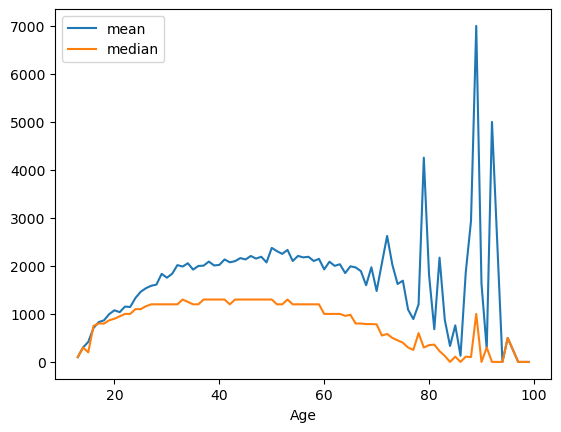

In [268]:
df.groupby('Age').agg(['mean', 'median'])['Income'].plot()

In [269]:
# Define the age ranges and corresponding labels for each category
age_bins = [0, 20, 30, 45, 60, float('inf')]
age_labels = ['0-20', '21-30', '31-45', '46-60', '61+']

# Use the cut() function to categorize the 'Age' column
df['Age'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Print the DataFrame with the categorized 'Age' column
df.head()

,State,Sex,Age,Race,Years of Study,Income,Height
0,11,0,21-30,8,12,800,1.603808
1,11,1,21-30,2,12,1150,1.739790
2,11,1,31-45,8,15,880,1.760444
3,11,0,46-60,2,6,3500,1.783158
4,11,1,46-60,8,9,150,1.690631


*Hypothesis*

- Average income of people with 61+ is less than the average of people between 31-60 
- Average income of people with 21-30 is less than the average of people between 31-60 

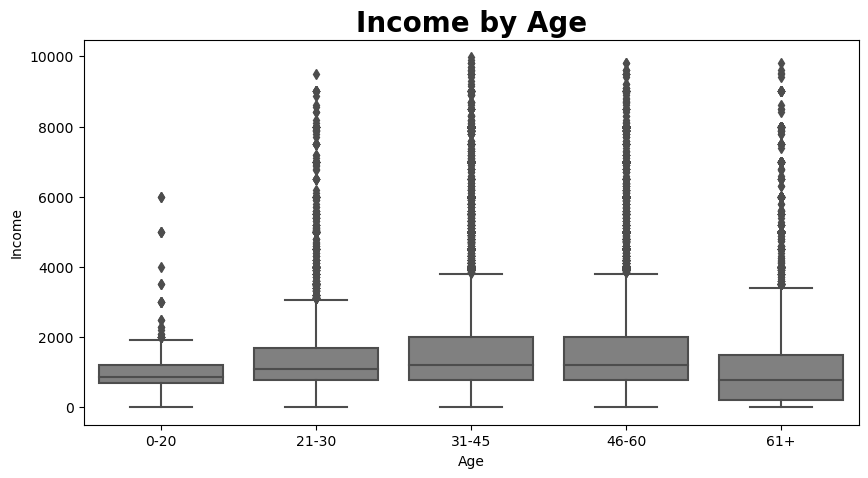

In [270]:
plt.figure(figsize=(10,5))

sns.boxplot(data=df.query('Income < 10000'), y='Income', x = 'Age', color='Grey')
plt.title('Income by Age', fontsize = 20, fontweight='bold')
        
plt.show()

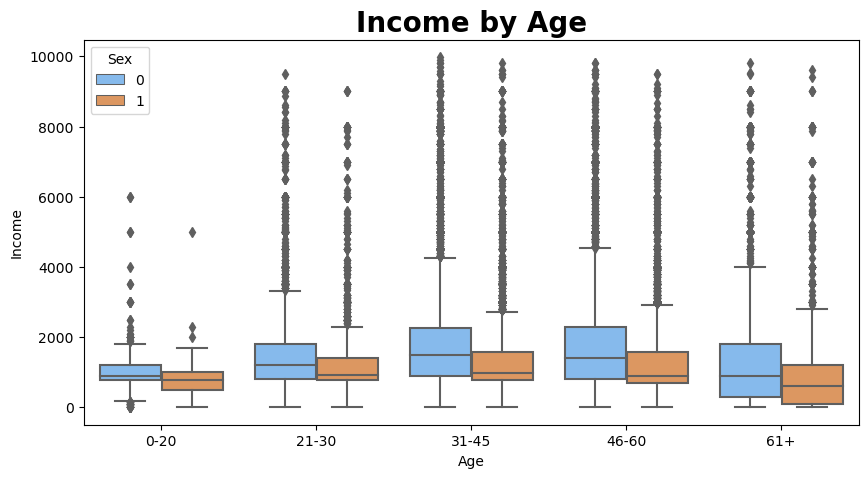

In [271]:
plt.figure(figsize=(10, 5))

ax = sns.boxplot(data=df.query('Income < 10000'), y='Income', x='Age', hue='Sex', palette=['#75bbfd', '#f0944d'])
plt.title('Income by Age', fontsize=20, fontweight='bold')

plt.show()

In [272]:
agg_income = pd.crosstab(df['Age'], df.Sex, 
            aggfunc = ['mean', 'median', 'max', 'std'], 
            values = df.Income).round(2)
agg_income.rename(columns = sex, inplace = True)

agg_income

mean          median           max              std         
Sex        Men    Women    Men Women     Men   Women      Men    Women
Age                                                                   
0-20   1068.78   775.03    900   788   25000    5000  1215.08   470.19
21-30  1640.09  1292.03   1200   939   48000   20000  1808.69  1431.19
31-45  2231.68  1605.52   1500   990  200000   60000  3186.45  2191.37
46-60  2431.09  1702.46   1500   920  200000  120000  3910.66  2862.23
61+    2143.25  1318.07   1000   600  200000  100000  5404.22  3945.24

##### Height

- Height has no correlation with income

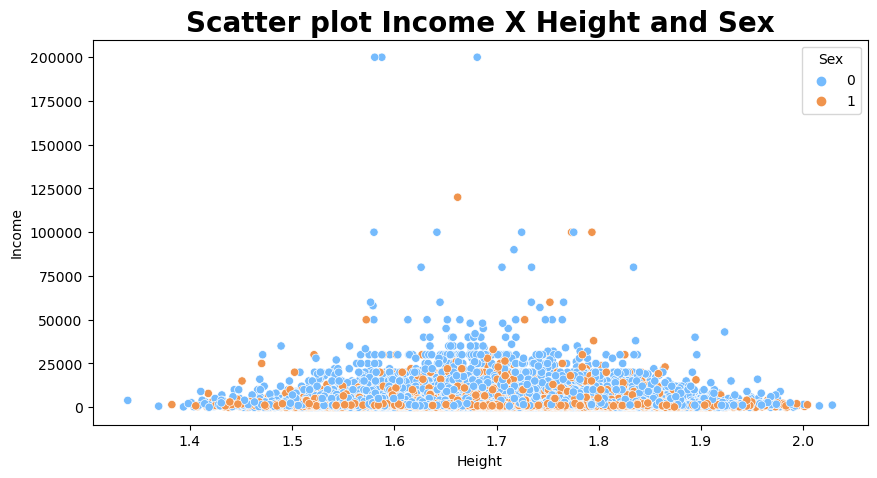

In [273]:
plt.figure(figsize=(10, 5))

sns.scatterplot(data= df, x='Height', y='Income', hue = 'Sex', palette=['#75bbfd', '#f0944d'])
plt.title('Scatter plot Income X Height and Sex', fontsize=20, fontweight='bold')

plt.show()

### **Questions about the data**

#### 1 - What percentage of people in our <i>dataset</i> earn a minimum wage (R$ 1.320) or less?

In [274]:
from scipy import stats

percent = stats.percentileofscore(df.Income, 1320, kind='weak')
print(f'{percent.round(2)}%')

55.83%


#### 2 - What is the maximum amount earned by 99% of the people in our <i>dataset</i>?

In [275]:
value = df.Income.quantile(0.99)
print('99% of incomes are below R$ {0:.2f}'.format(value))

99% of incomes are below R$ 15000.00


#### 3 - What is the State with the highest Median Income?

In [276]:
avg_income_state = df.groupby('State')['Income'].agg(['median', 'mean']).sort_values(by='median', ascending=False)
avg_income_state.rename(index=state, inplace=True)

print(f'The State with the highest average Income is: {avg_income_state.index[0]}')
styled_avg_income_state = avg_income_state.style.format('{:.2f}').background_gradient(cmap='YlOrBr')
styled_avg_income_state

The State with the highest average Income is: Distrito Federal


,median,mean
State,,
Distrito Federal,2000.00,4241.95
Santa Catarina,1800.00,2470.85
São Paulo,1600.00,2638.10
Goiás,1500.00,1994.58
Mato Grosso,1500.00,2130.65
Mato Grosso do Sul,1500.00,2262.60
Rio Grande do Sul,1500.00,2315.16
Paraná,1500.00,2493.87
Rio de Janeiro,1400.00,2496.40


## **``Statistical Inference``**

The Statistcal Inference will be divided into two parts: **Hypothesis Testing** and **Building Confidence Intervals**

### **Hypothesis Testing**

Having explored the data using descriptive statistics, it is now time to test the hypotheses we have gathered during that process. Below are all the hypotheses we will be examining:

1. *Gender-based Income Differences*
    - Men have a higher average income than women.
    - In State 27 (Alagoas) women have an equal average income to men.

2. *States affecting the average Income*
    - State 53 (Distrito Federal) has a higher average income than other states.

3. *Income Disparities Across Races*
    - People from the yellow race have a higher average income than other races.
    - White people have a higher average income than indigenous, black, and pard races.

4. *Education and Income*
    - Years of study are positively correlated with average income.
    - The average income of people with more years of education is higher than those with fewer years of education.

5. *Income Disparities Across Age Groups*
    - The average income of people aged 61 and above is less than the average income of people aged 31-60.
    - The average income of people aged 21-30 is less than the average income of people aged 31-60.

By testing these hypotheses, we aim to gain deeper insights into the relationships and patterns within the data and draw meaningful conclusions about the factors influencing income levels.

#### **1. Gender-based Income Differences**

##### 1.1. Men have a higher average income than women

Hypothesis $H_0$ e $H_1$

- $H_0$: $\mu_{\text{women}} \geq \mu_{\text{men}}$
- $H_1$: $\mu_{\text{women}} < \mu_{\text{men}}$


**Result:** Reject $H_0$

**Interpretation:** Men have a significantly higher income than women with a 95% confidence level.

In [277]:
# Geting women and men Income sample from our dataset
women = df[df['Sex'] == 1]['Income'].sample(n = 500, random_state = 101)
men = df[df['Sex'] == 0]['Income'].sample(n = 500, random_state = 101)

In [278]:
# Creating function for ind. ttest
def t_test(mean1, mean2, alternative='less'):
    # Perform independent t-test
    t_stat, p_value = ttest_ind(mean1, mean2, alternative=alternative)

    # Print the test statistics and p-value
    print('t Statistics:', t_stat)
    print('p-value:', p_value)

    # Interpreting the results
    alpha = 0.05

    if alternative == 'less':
        if p_value < alpha:
            print("Reject the null hypothesis (mean1 < mean2).")
        else:
            print("Fail to reject the null hypothesis (mean1 >= mean2).")
    elif alternative == 'greater':
        if p_value < alpha:
            print("Reject the null hypothesis (mean1 > mean2).")
        else:
            print("Fail to reject the null hypothesis (mean1 <= mean2).")
    elif alternative == 'two-sided':
        if p_value < alpha:
            print("Reject the null hypothesis (mean1 is not equal to mean2).")
        else:
            print("Fail to reject the null hypothesis (mean1 is equal to mean2).")
    
    return t_stat

In [279]:
t_stat = t_test(women, men, alternative='less')

t Statistics: -5.8656200577647555
p-value: 3.040104009433685e-09
Reject the null hypothesis (mean1 < mean2).


In [280]:
# Creating function to plot the distribution of t-statistic
def plot_t_test(women, men, alternative='less'):
    # Perform independent t-test
    t_stat, p_value = ttest_ind(women, men, alternative=alternative)

    # Plotting distribution of t-statistic
    degrees_freedom = women.count() + men.count() - 2
    alpha = 0.05  # significance level
    critical_value = t.ppf(1 - alpha, degrees_freedom)  # calculate the critical value for t-stat

    x = np.linspace(-6, 6, 1000)  # x-axis values
    y = t.pdf(x, degrees_freedom)  # corresponding y-axis values for a t-distribution with degrees of freedom (df)

    plt.figure(figsize=(15, 5))

    plt.plot(x, y, color='black', label='t-Distribution')

    # Add a vertical line representing the t-statistic and a text with its value
    plt.axvline(x=t_stat, color='red', linestyle='--', label='t-Statistic')
    plt.text(t_stat, t.pdf(t_stat, degrees_freedom), f't = {t_stat:.2f}', size=20, color='black', verticalalignment='bottom', horizontalalignment='left')

    # Fill the rejection zone and the FTR zone based on alternative hypothesis
    if alternative == 'less':
        plt.fill_between(x, y, where=x < -critical_value, color='salmon', alpha=0.3, label='Rejection Zone')
        plt.fill_between(x, y, where=(x >= -critical_value), color='lightblue', alpha=0.3, label='FTR Zone')
    elif alternative == 'greater':
        plt.fill_between(x, y, where=x > critical_value, color='salmon', alpha=0.3, label='Rejection Zone')
        plt.fill_between(x, y, where=(x <= critical_value), color='lightblue', alpha=0.3, label='FTR Zone')
    elif alternative == 'two-sided':
        plt.fill_between(x, y, where=x < -critical_value, color='salmon', alpha=0.3, label='Rejection Zone')
        plt.fill_between(x, y, where=(x > critical_value), color='salmon', alpha=0.3)
        plt.fill_between(x, y, where=(x >= -critical_value) & (x <= critical_value), color='lightblue', alpha=0.3, label='FTR Zone')

    plt.title('Distribution of t-Statistic', size=20, fontweight='bold', loc='left')
    plt.xlabel('t', size=12)  # Replace with an appropriate label
    plt.ylabel('Probability Density', size=12)  # Replace with an appropriate label
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

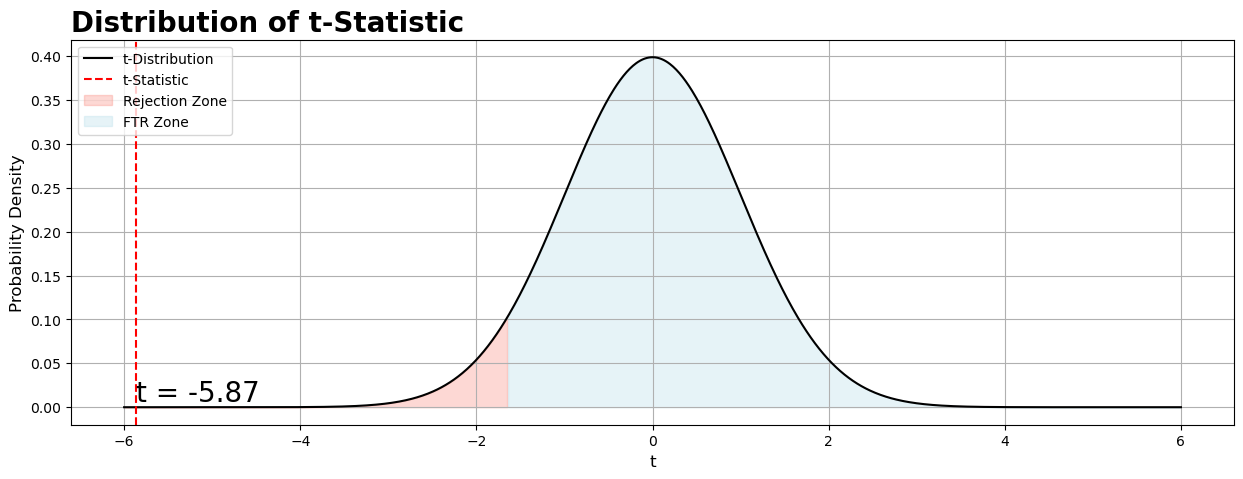

In [281]:
plot_t_test(women, men, alternative='less')

##### 1.2. In State 27 (Alagoas) women have an equal average income to men.

Hypothesis $H_0$ e $H_1$

- $H_0$: $\mu_{\text{women state 27}} = \mu_{\text{men state 27}}$
- $H_1$: $\mu_{\text{women state 27}} ≠ \mu_{\text{men state 27}}$

**Result:** Fail to Reject $H_0$

**Interpretation:** Men and women have a equal average income for state 27 with a 95% confidence level.

In [282]:
# Geting sample from our dataset
alagoas_women = df[(df['State'] == 27) & (df['Sex'] == 1) ]['Income'].sample(n = 200, random_state = 101)
alagoas_men = df[(df['State'] == 27) & (df['Sex'] == 0)]['Income'].sample(n = 200, random_state = 101)

t Statistics: -0.09967156684207332
p-value: 0.9206552586169636
Fail to reject the null hypothesis (mean1 is equal to mean2).


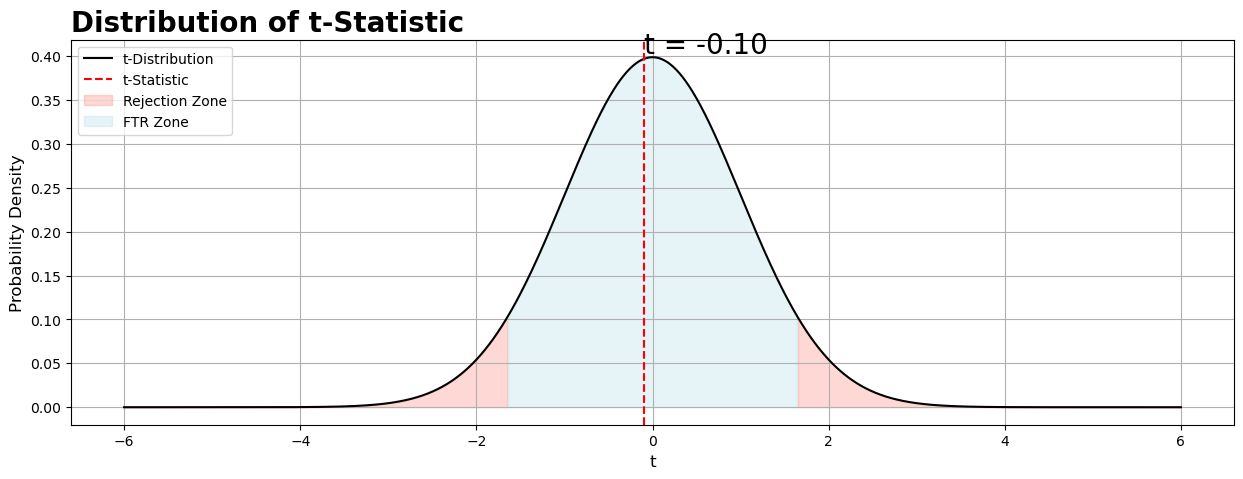

In [283]:
# t_stat function
t_stat = t_test(alagoas_women, alagoas_men, alternative='two-sided')

# plot_t_test function
plot_t_test(alagoas_women, alagoas_men, alternative='two-sided')

#### **2. States affecting the average Income**

##### 2.1. State 53 (Distrito Federal) has a higher average income than other states.

Hypothesis $H_0$ e $H_1$

- $H_0$: $\mu_{\text{other states}} \geq \mu_{\text{distrito federal}}$
- $H_1$: $\mu_{\text{other states}} < \mu_{\text{distrito federal}}$

**Result:** Reject $H_0$

**Interpretation:** State 53 (Distrito Federal) has a higher average income than other states with a 95% confidence level.

In [284]:
# Geting sample from our dataset
distrito_federal= df[(df['State'] == 53)]['Income'].sample(n = 200, random_state = 101)
other_states = df[(df['State'] != 53)]['Income'].sample(n = 200, random_state = 101)

t Statistics: -2.9783701115053183
p-value: 0.0015376192219145955
Reject the null hypothesis (mean1 < mean2).


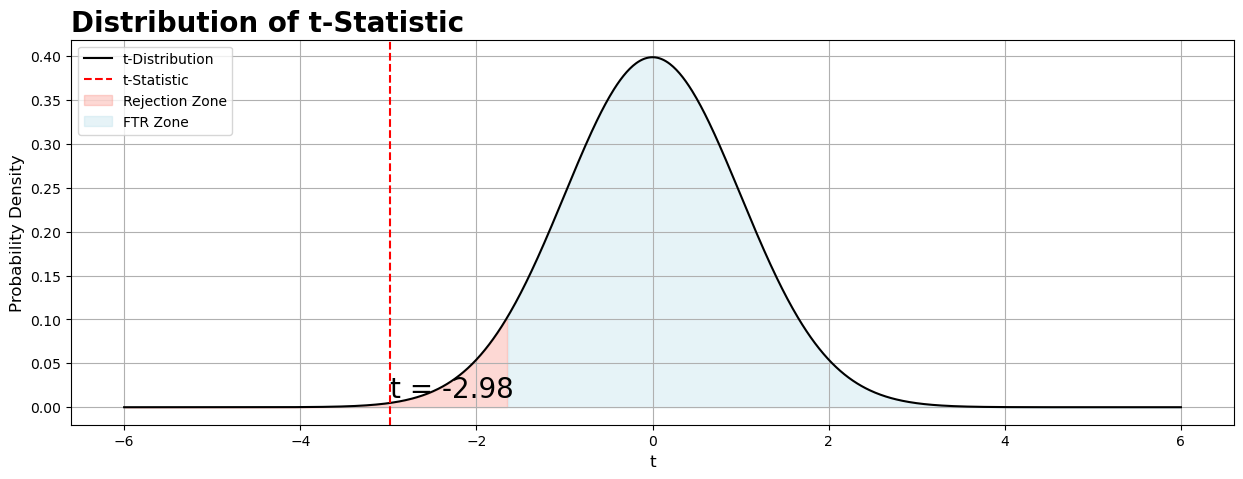

In [285]:
# t_stat function
t_stat = t_test(other_states, distrito_federal, alternative='less')

# plot_t_test function
plot_t_test(other_states, distrito_federal, alternative='less')

#### **3. Income Disparities Across Races** 

##### 3.1. People from the yellow race (6) have a higher average income than other races.

Hypothesis $H_0$ e $H_1$

- $H_0$: $\mu_{\text{other races}} \geq \mu_{\text{yellow}}$
- $H_1$: $\mu_{\text{other races}} < \mu_{\text{yellow}}$

**Result:** Reject $H_0$

**Interpretation:** People from the yellow race have a higher average income than other races with a 95% confidence level.

In [286]:
# Geting sample from our dataset
yellow = df[(df['Race'] == 6)]['Income'].sample(n = 200, random_state = 101)
other_races = df[(df['Race'] != 6)]['Income'].sample(n = 200, random_state = 101)

t Statistics: -5.580955052887501
p-value: 2.215572192182894e-08
Reject the null hypothesis (mean1 < mean2).


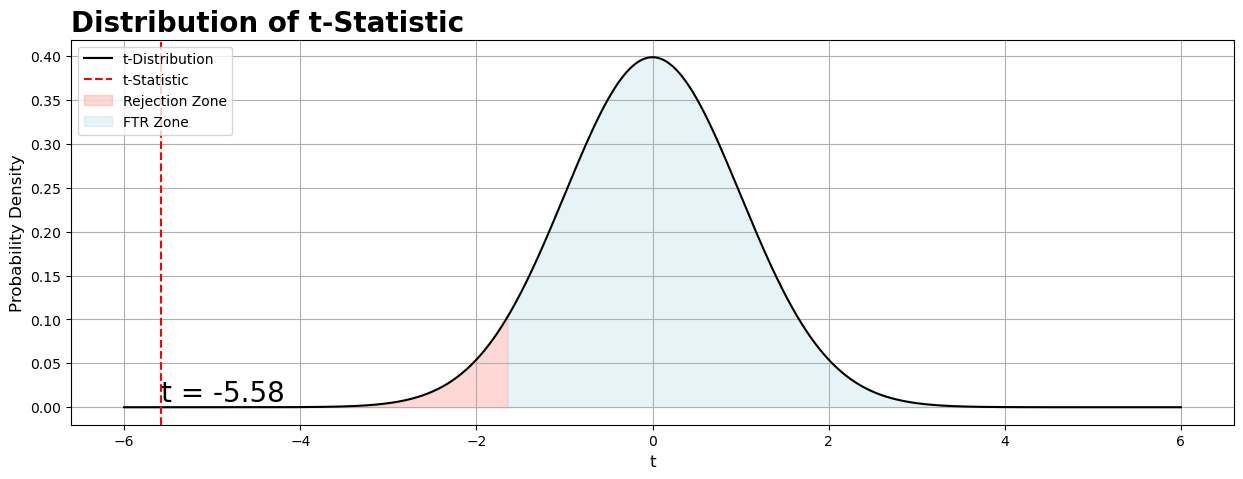

In [287]:
# t_stat function
t_stat = t_test(other_races, yellow, alternative='less')

# plot_t_test function
plot_t_test(other_races, yellow, alternative='less')

##### 3.2. White people have a higher average income than indigenous, black, and pard races.

Hypothesis $H_0$ e $H_1$

- $H_0$: $\mu_{\text{indigenous, black, pard}} \geq \mu_{\text{white}}$
- $H_1$: $\mu_{\text{indigenous, black, pard}} < \mu_{\text{white}}$

**Result:** Reject $H_0$

**Interpretation:** People from the wwhite race have a higher average income than the average of indigenous, black, and pard races with a 95% confidence level.

In [288]:
# Geting sample from our dataset
white = df[(df['Race'] == 2)]['Income'].sample(n = 200, random_state = 101)
ind_bla_pard = df[(df['Race'].isin([0, 4, 8]))]['Income'].sample(n = 200, random_state = 101)

t Statistics: -4.085027044542868
p-value: 2.6654672651646398e-05
Reject the null hypothesis (mean1 < mean2).


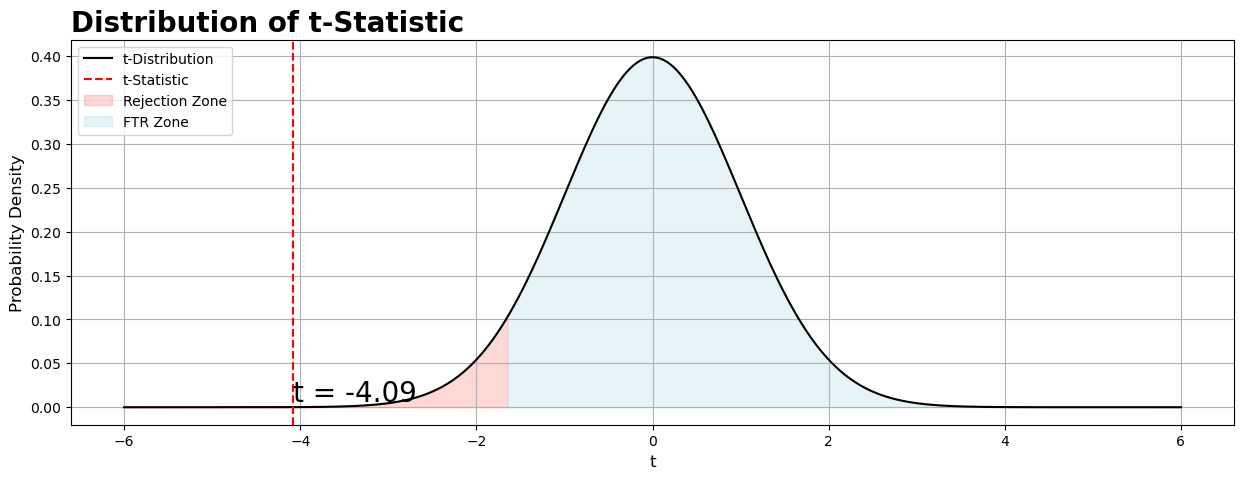

In [289]:
# t_stat function
t_stat = t_test(ind_bla_pard, white, alternative='less')

# plot_t_test function
plot_t_test(ind_bla_pard, white, alternative='less')

#### **4. Education and Income**

##### 4.1. Years of study is positively correlated with average income

Hypothesis $H_0$ e $H_1$

- $H_0$: $\text{Correlation} \leq 0$
- $H_1$: $\text{Correlation} > 0$

**Result:** 

**Interpretation:** 

In [290]:
pearsonr(df['Years of Study'], df['Income'])

PearsonRResult(statistic=0.33410340569526653, pvalue=0.0)

##### 4.2. Average income of people with 15 or more years of education is higher than of people with 14 years

Hypothesis $H_0$ e $H_1$

- $H_0$: $\mu_{\text{14 years}} \geq \mu_{\text{15 years or more}}$
- $H_1$: $\mu_{\text{14 years}} < \mu_{\text{15 years or more}}$

**Result:** Reject $H_0$

**Interpretation:** Average income of people with 15 or more years of education is higher than of people with 14 years with a 95 confidence level

In [291]:
print(years_of_study)

{0: 'Undetermined', 1: '0 or < 1', 2: '1 year', 3: '2 years', 4: '3 years', 5: '4 years', 6: '5 years', 7: '6 years', 8: '7 years', 9: '8 years', 10: '9 years', 11: '10 years', 12: '11 years', 13: '12 years', 14: '13 years', 15: '14 years', 16: '>= 15'}


In [292]:
# Getting sample from our dataset
fifteen_years = df.loc[df['Years of Study'] == 16, 'Income'].sample(n=200, random_state=101)
fourteen_years = df.loc[df['Years of Study'] == 14, 'Income'].sample(n=200, random_state=101)

t Statistics: -6.141215845354181
p-value: 9.92608929578543e-10
Reject the null hypothesis (mean1 < mean2).


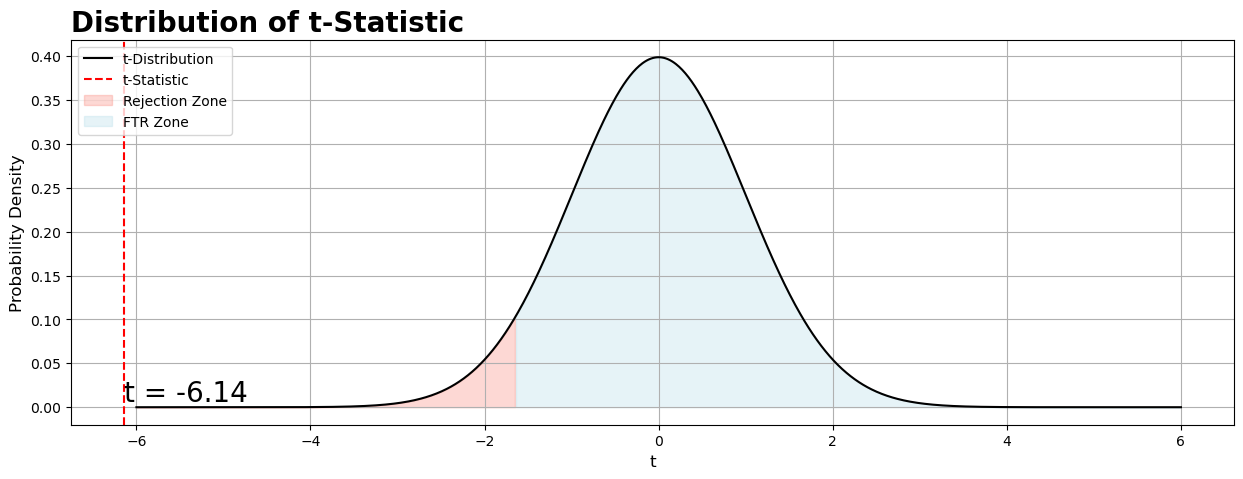

In [293]:
# t_stat function
t_stat = t_test(fourteen_years, fifteen_years, alternative='less')

# plot_t_test function
plot_t_test(fourteen_years, fifteen_years, alternative='less')

##### 4.3. If people with 12 years of education study 1 more year, getting at 13 years. Will they have higher income?

Hypothesis $H_0$ e $H_1$

- $H_0$: $\mu_{\text{12 years}} \geq \mu_{\text{13 years}}$
- $H_1$: $\mu_{\text{12 years}} < \mu_{\text{13 years}}$

**Result:** Reject $H_0$

**Interpretation:** Average income of people with 13 years of education is higher than of people with 11 years with a 95 confidence level

In [294]:
# Getting sample from our dataset
eleven_years = df.loc[df['Years of Study'] == 11, 'Income'].sample(n=200, random_state=101)
twelve_years = df.loc[df['Years of Study'] == 12, 'Income'].sample(n=200, random_state=101)

t Statistics: -2.321907357837193
p-value: 0.01037094565804318
Reject the null hypothesis (mean1 < mean2).


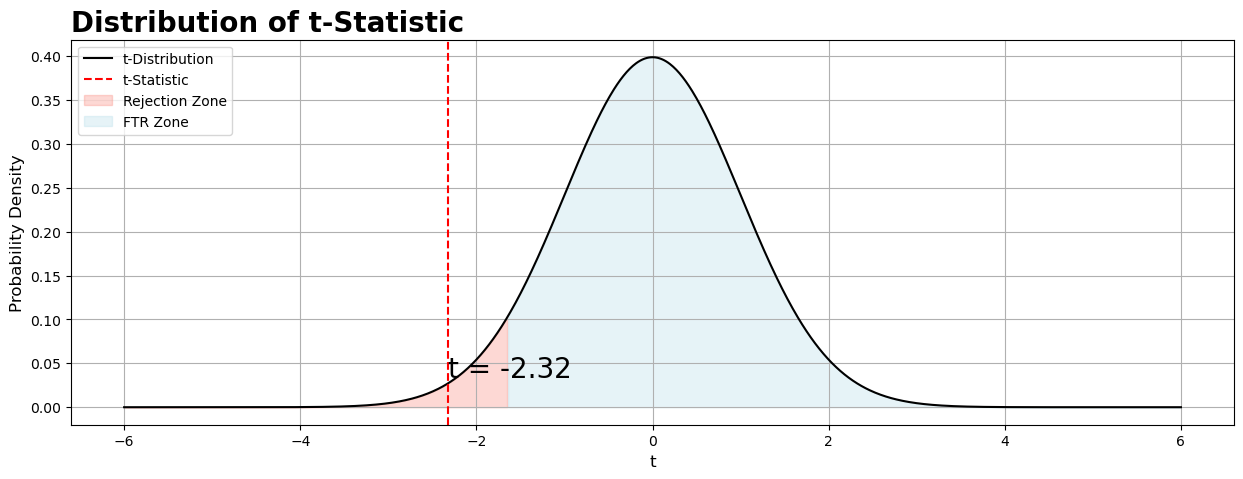

In [295]:
# t_stat function
t_stat = t_test(eleven_years, twelve_years, alternative='less')

# plot_t_test function
plot_t_test(eleven_years, twelve_years, alternative='less')

#### **5. Income Disparities Across Age Groups**

##### 5.1. The average income of people aged 61 and above is less than the average income of people aged 31-60

Hypothesis $H_0$ e $H_1$

- $H_0$: $\mu_{\text{age 61+}} \geq \mu_{\text{age 31-60}}$
- $H_1$: $\mu_{\text{age 61+}} < \mu_{\text{age 31-60}}$

**Result:** Fail to Reject $H_0$

**Interpretation:** Data does not provide sufficient evidence to conclude that there is a significant difference in average income between these two age groups.

In [296]:
# Getting sample from our dataset
thirty_sixty_age = df.loc[df['Age'].isin(['31-45', '46-60']) , 'Income'].sample(n=500, random_state=101)
sixty_oneplus_age = df.loc[df['Age'] == '61+', 'Income'].sample(n=500, random_state=101)

t Statistics: -0.24354051306437957
p-value: 0.4038183776188843
Fail to reject the null hypothesis (mean1 >= mean2).


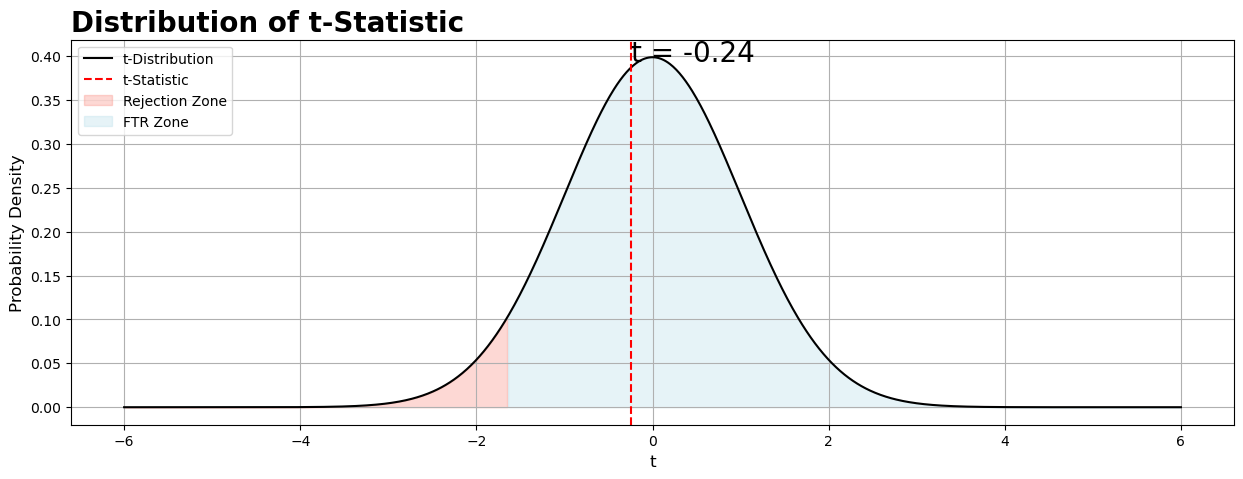

In [297]:
# t_stat function
t_stat = t_test(sixty_oneplus_age, thirty_sixty_age, alternative='less')

# plot_t_test function
plot_t_test(sixty_oneplus_age, thirty_sixty_age, alternative='less')

##### 5.2. The average income of people aged 21-30 is less than the average income of people aged 31-60

Hypothesis $H_0$ e $H_1$

- $H_0$: $\mu_{\text{age 21-30}} \geq \mu_{\text{age 31-60}}$
- $H_1$: $\mu_{\text{age 21-30}} < \mu_{\text{age 31-60}}$

**Result:** Reject $H_0$

**Interpretation:** The average income of people aged 21-30 is lower than the average income of people aged 31-60, with a 95% confidence level

In [298]:
# Getting sample from our dataset
thirty_sixty_age = df.loc[df['Age'].isin(['31-45', '46-60']) , 'Income'].sample(n=500, random_state=101)
twentyone_thrity_age = df.loc[df['Age'] == '21-30', 'Income'].sample(n=500, random_state=101)

t Statistics: -4.024430487295152
p-value: 3.0715921933961925e-05
Reject the null hypothesis (mean1 < mean2).


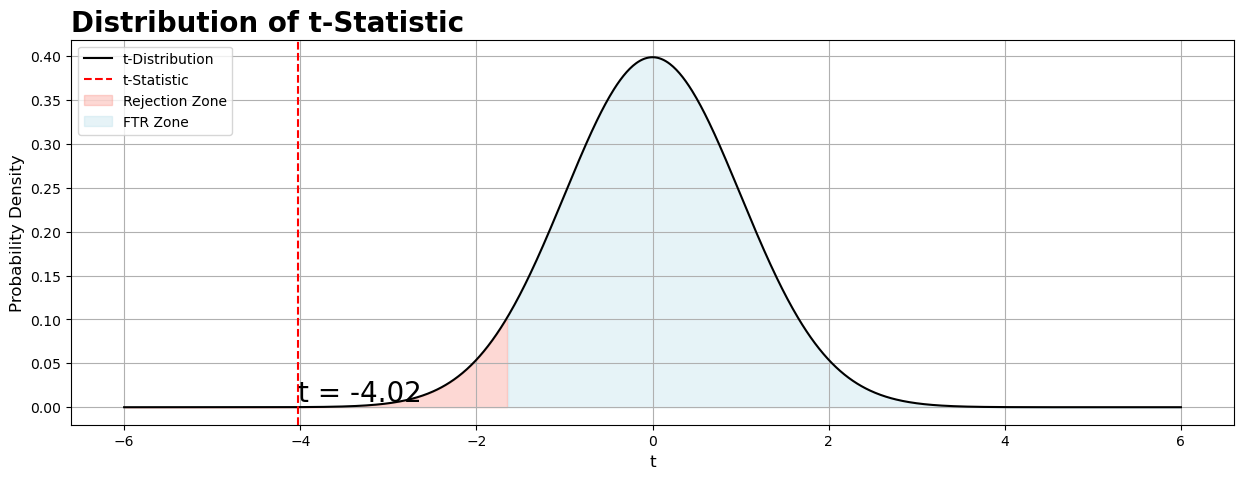

In [299]:
# t_stat function
t_stat = t_test(twentyone_thrity_age, thirty_sixty_age, alternative='less')

# plot_t_test function
plot_t_test(twentyone_thrity_age, thirty_sixty_age, alternative='less')

### **Building Confidence Intervals**

Confidence intervals provide an estimated range of plausible values for an unknown population parameter. They help us understand the precision and uncertainty associated with our sample estimates.

These are the confidence intervals we are going to build:

1. 99% C.I for the mean population Income
1. 95% C.I for the mean population Income by Race
1. 95% C.I for the mean population Height


To build the Confidence Intervals we will be using the **normal.interval** function from **scipy.stats** Wwe could also use **t.inverval**, but since we have a large sample size we will be using the first one.

Formula:
CI = EST ± z * SE

#### **1. 99% C.I for the mean population Income**

##### Doing the calculus by hand

In [314]:
n_samples = df.shape[0]
mean_sample_income = df.Income.mean()
std_sample_income = df.Income.std()
se_income = std_sample_income / np.sqrt(n_samples)

# Degrees of freedom
degrees_freedom = n_samples - 1

# Setting our confidence level of 95%
alpha = 0.05

# Calculating the t-value for the given confidence level and degrees of freedom
t_value = t.ppf(1 - alpha / 2, degrees_freedom)

# Calculating the margin of error
margin_of_error = t_value * se_income

# Calculating the inferior and superior limits
inferior_limit = mean_sample_income - margin_of_error
superior_limit = mean_sample_income + margin_of_error

# Printing the results
print(f'We are 95% confident that the true population mean Income lies in this interval: ({inferior_limit.round(5)}, {superior_limit.round(5)})')


We are 95% confident that the true population mean Income lies in this interval: (1976.88458, 2023.88181)


##### Using t.interval from scipy.stats

In [316]:
# Calculating the C.I using t.interval
c_i = t.interval(confidence=0.95, df = degrees_freedom, loc=mean_sample_income, scale=se_income)
print(f'We are 95% confident that the true population mean Income lies in this interval: {c_i}')

We are 95% confident that the true population mean Income lies in this interval: (1976.8845838407804, 2023.881813868746)


#### **2. 95% C.I for the mean population Income by Race**

In [302]:
race

{0: 'Indigenous', 2: 'White', 4: 'Black', 6: 'Yellow', 8: 'Pard'}

In [324]:
confidence_interval_list = []

for key, value in race.items():
    confidence_interval_data = {}

    n_samples = df[df['Race'] == key].shape[0]
    mean_sample_income = df[df['Race'] == key].Income.mean()
    std_sample_income = df[df['Race'] == key].Income.std()
    se_income = std_sample_income / np.sqrt(n_samples)

    # Degrees of freedom
    degrees_freedom = n_samples - 1

    # Calculating Confidence Interval
    c_i = t.interval(confidence=0.95, df = degrees_freedom, loc=mean_sample_income, scale=se_income)

    # Adding to the dictionary
    confidence_interval_data['Race'] = value
    confidence_interval_data['CI'] = '95%'
    confidence_interval_data['Income Inferior Limit'] = c_i[0]
    confidence_interval_data['Income Superior Limit'] = c_i[1]

    # appending to confidence_interval_list
    confidence_interval_list.append(confidence_interval_data)

In [325]:
confidence_interval = pd.DataFrame(confidence_interval_list)
print('We are 95% confident that the true population mean Income lies in this interval for each race:')
confidence_interval.sort_values(by='Income Superior Limit', ascending=False)

We are 95% confident that the true population mean Income lies in this interval for each race:


,Race,CI,Income Inferior Limit,Income Superior Limit
3,Yellow,95%,3635.813228,4730.027681
1,White,95%,2631.018615,2727.020046
0,Indigenous,95%,801.626116,2144.149794
4,Pard,95%,1491.540549,1535.651657
2,Black,95%,1404.404158,1480.185521


#### **3. 95% C.I for the mean population Height**

In [320]:
n_samples = df.shape[0]
mean_sample_height = df.Height.mean()
std_sample_height = df.Height.std()
se_height = std_sample_height / np.sqrt(n_samples)

# Degrees of freedom
degrees_freedom = n_samples - 1

# Calculating Confidence Interval
c_i = t.interval(confidence=0.95, df = degrees_freedom, loc=mean_sample_height, scale=se_height)

# Printing the results
print(f'We are 95% confident that the true population mean Height lies in this interval: {c_i}')

We are 95% confident that the true population mean Height lies in this interval: (1.6989487975266346, 1.7000761105885278)
